In [1]:
# Load The data
path = "/content/drive/MyDrive/Data Scienc/heart-disease.csv"
import pandas as pd
heart_disease = pd.read_csv(path)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
 # Standerd liabrary
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Splitting the data into features (X) and labels (y)
X = heart_disease.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
Y = heart_disease["target"]
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [6]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_training,x_test,y_training,y_test = train_test_split(X,Y,test_size=0.2)

# Here i'm use 20% of data for test and 80% for train

In [7]:
# Check the shapes of different data splits
x_training.shape,x_test.shape,y_training.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
X.shape

(303, 13)

In [9]:
# Covert data to numerical
path = "/content/drive/MyDrive/Data Scienc/car-sales-extended.csv"
car_sales = pd.read_csv(path)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
# Split the data into X,Y
X = car_sales.drop("Price",axis=1)
Y = car_sales["Price"]

from sklearn.ensemble import RandomForestRegressor
x_training,x_test,y_training,y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
# model = RandomForestRegressor()
# model.fit(x_training,y_training)

In [12]:
# Hmmmm 🤔🤔 could not convert string to float: 'Honda'
# So we need convert Data to numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [13]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [14]:
# How can we do that without using sklearn Hmmmmmm 🤔 Intresting 😝
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [15]:
# Hmmm the values are boolean ???
# So I will use method astype(int)

dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [16]:
# # Let't refit the model
# x_training,x_test,y_training,y_test = train_test_split(transformed_X,Y,test_size=0.2)
# model.fit(x_training,y_training)

In [17]:
# model.score(x_test,y_test)

**Fill the messing data using pandas**

In [18]:
path = "/content/drive/MyDrive/Data Scienc/car-sales-extended-missing-data.csv"
car_sales_missing = pd.read_csv(path)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [19]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [20]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [21]:
# Fill the missing data of colums Make
car_sales_missing["Make"].fillna("missing",inplace=True)
# Fill the missing data of colums Colour
car_sales_missing["Colour"].fillna("missing",inplace=True)
# Fill the missing data of colums Doors
car_sales_missing["Doors"].fillna(4,inplace=True)
# Fill the missing data of Price
car_sales_missing["Price"].fillna(np.mean(car_sales_missing["Price"]),inplace=True)

<ipython-input-21-0593eab14bb7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace=True)
<ipython-input-21-0593eab14bb7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 3.54310e+04,
        4.00000e+00, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.92714e+05,
        5.00000e+00, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 8.47140e+04,
        4.00000e+00, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 6.66040e+04,
        4.00000e+00, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.15883e+05,
        4.00000e+00, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.48360e+05,
        4.00000e+00, 1.27320e+04]])

In [23]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0,32042.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0,5716.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0,31570.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0,4001.0


In [24]:
# X = car_sales_missing.drop("Price",axis=1)
# Y = car_sales_missing["Price"]
# x_training,x_test,y_training,y_test = train_test_split(transformed_X,Y,test_size=0.2)
# model.fit(x_training,y_training)

**Fill The missing data using sklearn**

In [25]:
car_sales_missing = pd.read_csv(path)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [27]:
# ipython-input-40-59ec1fc98bd4
# Remove rows with missing 'Price' values without assigning None to the 'Price' column
car_sales_missing.dropna(subset=["Price"], inplace=True)
# You don't need to assign the result back to the 'Price' column since inplace=True modifies the DataFrame directly
car_sales_missing['Price'].isna().sum()

0

In [28]:
# Split data into x&y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [29]:
# Fill The missing data using Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill categorical values with 'missing' and numerical values with mean
categorical_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")
# Define columns
categorical_features = ["Make","Colour"]
door_feature = ["Doors"]
numerical_features = ["Odometer (KM)"]

# Creat an imputer (something that fills data)
imputer = ColumnTransformer([("categorical_imputer",categorical_imputer,categorical_features),("door_imputer",door_imputer,door_feature),("num_imputer",numerical_imputer,numerical_features)])
# Transform the data
filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4, 35431.0],
       ['BMW', 'Blue', 5, 192714.0],
       ['Honda', 'White', 4, 84714.0],
       ...,
       ['Nissan', 'Blue', 4, 66604.0],
       ['Honda', 'White', 4, 215883.0],
       ['Toyota', 'Blue', 4, 248360.0]], dtype=object)

In [30]:
car_sales_filled = pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431.0
1,BMW,Blue,5,192714.0
2,Honda,White,4,84714.0
3,Toyota,White,4,154365.0
4,Nissan,Blue,3,181577.0


In [31]:
car_sales_filled.isna().sum()

,0
Make,0
Colour,0
Doors,0
Odometer (KM),0


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [33]:
Matrix = pd.DataFrame(transformed_X)
Matrix


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
Matrix.shape

(1000, 13)

In [35]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431.0
1,BMW,Blue,5,192714.0
2,Honda,White,4,84714.0
3,Toyota,White,4,154365.0
4,Nissan,Blue,3,181577.0


In [36]:
# Now data is numerical 😍😍😍😍
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_training,x_test,y_training,y_test = train_test_split(transformed_X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_training,y_training)
model.score(x_test,y_test)

0.22909395650304976

In [37]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing_data = fetch_california_housing() # Assign to a new variable to preserve original

# Create the DataFrame using the original data
housing = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# Add the target variable to the DataFrame
housing["target"] = housing_data.target # Access target from the original object

housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:
# How many samples?
len(housing)

20640

In [40]:
import numpy as np

# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing.drop("target", axis=1)
y = housing["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.5758549611440126

In [41]:
from sklearn.ensemble import RandomForestRegressor
# Create the data
X = housing.drop("target", axis=1)
y = housing["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.8052244794091031

In [42]:
## 😍😍😍😍 inpresife when i use RandomForestRegressor the score Of model is 0.8 ~ 80% higher than Ridge model ~ 0.5 ~ 50%

In [43]:
# Now import heart_desies data that is araledy import
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
len(heart_disease)

303

In [45]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Split the data into x,y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = LinearSVC()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)



0.8688524590163934

In [46]:
# Using Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Split the data into x,y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8688524590163934

In [47]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<h1>Fitting the Model into DATA</h1>

In [48]:
# Using Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Split the data into x,y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150)
# Fit the data(training machine learning models)
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8688524590163934

<h1> Making predictions with our ml model</h1>

In [49]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [52]:
clf.score(x_test,y_test)

0.8688524590163934

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

In [54]:
# Make prediction with predict_prob()
clf.predict_proba(x_test[:5]) # Make prediction to first five data

array([[0.87333333, 0.12666667],
       [0.43333333, 0.56666667],
       [0.41333333, 0.58666667],
       [0.86666667, 0.13333333],
       [0.17333333, 0.82666667]])

In [55]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [56]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


<h1>Make prediction to reggression moodel</h1>

In [57]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
len(housing)

20640

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Split data to x,y
x = housing.drop("target",axis=1)
y = housing["target"]
# split data to training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# make model and fit it
model = RandomForestRegressor(n_estimators=100).fit(x_train,y_train)

# model.score(x_test,y_test)
y_preds = model.predict(x_test)
y_preds


array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [60]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

<h2>Mean absolute error 🥶🥶🥶</h2>

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

<h1>Evaluting a machine learning models</h1>

In [62]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150).fit(x_train,y_train)

clf.score(x_test,y_test)

0.8688524590163934

In [63]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x =housing.drop("target",axis=1)
y = housing["target"]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestRegressor(n_estimators=150).fit(x_train,y_train)

clf.score(x_test,y_test)

0.8067552020325517

<h1>scoring parameter: defining model evaluation rules</h1>

1.   List item
2.   List item



In [64]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150).fit(x_train,y_train)

clf.score(x_test,y_test)


0.8688524590163934

In [65]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.90163934, 0.75409836, 0.8       , 0.75      ])

In [66]:
cross_val_score(clf,X,y,cv=10)

array([0.87096774, 0.77419355, 0.87096774, 0.9       , 0.9       ,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [67]:
np.random.seed(42)

# single training and test split sscore
clf_score = np.mean(cross_val_score(clf,X,y,cv=5))
clf_score
clf_single_score = clf.score(x_test,y_test)
clf_single_score

0.8688524590163934

In [68]:
clf_score,clf_single_score

(0.8347540983606558, 0.8688524590163934)

<h1>Classification model evaluation models</h1>

*   Accurasy
*   Area under cruve ROC
*   confusion matrix
*   Classification report

**Accurasy**



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150).fit(x_train,y_train)

cross_val_score(clf,x,y,cv=5)


array([0.81967213, 0.90163934, 0.75409836, 0.8       , 0.75      ])

In [70]:
print(f"The cross-validated accuracy is: {np.mean(cross_val_score(clf,x,y,cv=5))*100:.2f}%")

The cross-validated accuracy is: 82.81%


**Area Under Receiver Operating Characteristic (ROC) Curve**
It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [71]:
# Create x train ...ect
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [72]:
from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.10714286, 0.10714286, 0.14285714, 0.14285714,
       0.39285714, 0.39285714, 0.53571429, 0.57142857, 0.57142857,
       1.        ])

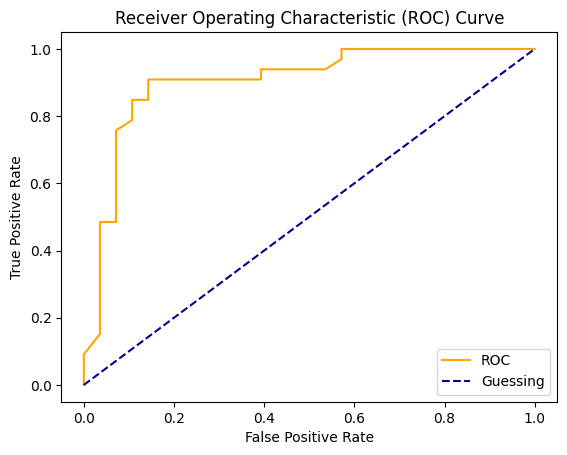

In [73]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

0.9036796536796536

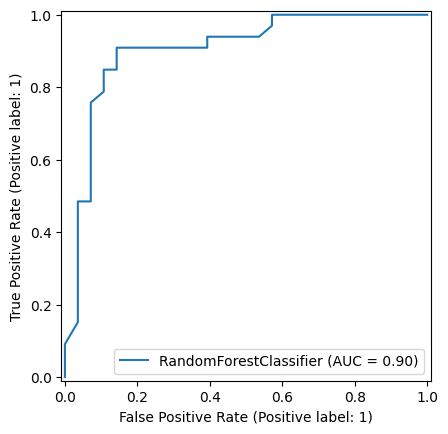

In [75]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, X=x_test, y=y_test)

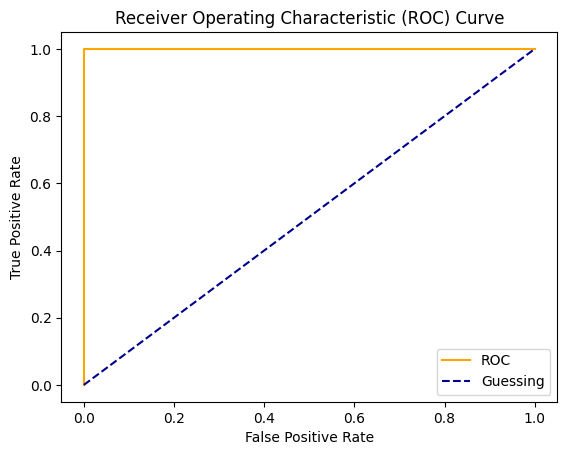

In [76]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [77]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**
Another fantastic way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [78]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  4],
       [ 5, 28]])

In [79]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,4
1,5,28


Text(0.5, 1.0, 'Confusion Matrix')

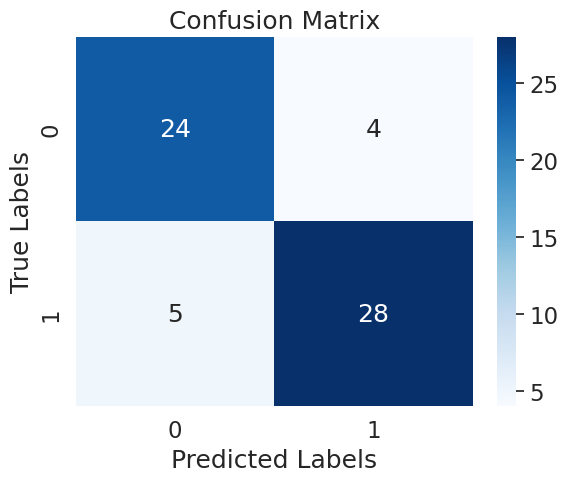

In [80]:
# Make our confusion_matrix more visual using seaborn 😘
import seaborn as sns
# Set the front scale
sns.set(font_scale=1.5)

# Create confusion_matrix
confus = confusion_matrix(y_test,y_preds)

# Plot it
sns.heatmap(confus,annot=True,cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

**Create counfusing matrix using skit-learn 🤔**

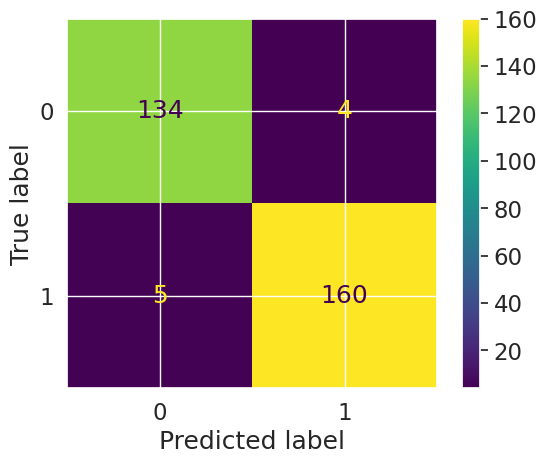

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

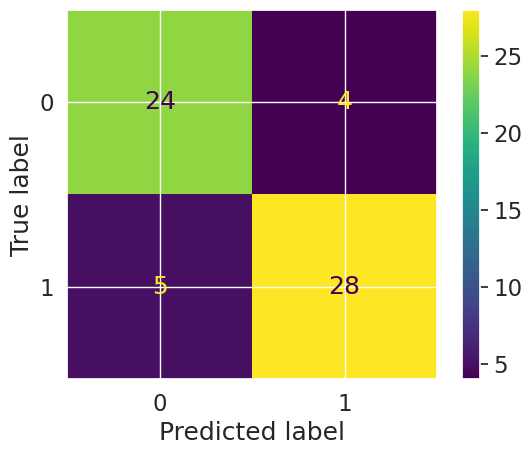

In [82]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Report**

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [84]:
# Where presicion and recall become velubal ??
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case
disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**Regression model evaluation metrics sklearn*[link text](https://scikit-learn.org/1.5/modules/model_evaluation.html)*



*   R^2 (r-squard)
*   Mean Absolut error (MAE)

*  Mean absolut squard (MAS)

🤣🤣🤣🤣🤣

**R^2**






In [85]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing.drop("target",axis=1)
y = housing["target"]

clf = RandomForestRegressor(n_estimators=150).fit(x_train,y_train)

clf.score(x_test,y_test)

0.49229749879749884

In [86]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361, 0.54098361, 0.54098361, 0.54098361, 0.54098361,
       0.54098361])

In [87]:
r2_score(y_test,y_test_mean)

0.0

In [88]:
r2_score(y_test,y_test)

1.0

**Mean absolut error (MEA)**

In [89]:
from sklearn.metrics import mean_absolute_error
y_preds = clf.predict(x_test)
mea = mean_absolute_error(y_test,y_preds)
mea

0.25672131147540983

In [90]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]

In [91]:
df

,actual values,predicted values,differences
42,1,0.360000,-0.640000
212,0,0.306667,0.306667
231,0,0.020000,0.020000
118,1,0.926667,-0.073333
128,1,0.986667,-0.013333
...,...,...,...
15,1,0.966667,-0.033333
43,1,0.813333,-0.186667
140,1,0.946667,-0.053333
17,1,0.426667,-0.573333


**Mean Squared Error (MSE)**

In [92]:
from sklearn.metrics import mean_squared_error
y_preds = clf.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.12607285974499088

<h1>Using differnet evalution for diffrent matrics </h1>

In [93]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=150)

clf.fit(x_train,y_train)

# Make some predection
y_perds = clf.predict(x_test)


# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test,y_perds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_perds)}")
print(f"Recall: {recall_score(y_test,y_perds)}")
print(f"F1: {f1_score(y_test,y_perds)}")

Classifier metrics on the test set:
Accuracy: 86.89%
Precision: 0.8529411764705882
Recall: 0.90625
F1: 0.8787878787878788


<h1>Regression evaluation of functions</h1>

In [94]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing.drop("target",axis=1)
y = housing["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=150).fit(x_train,y_train)

y_preds = model.predict(x_test)

# Evaluat The regression model
print("Regression metrics on the test set:")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set:
R^2: 0.8067552020325517
MAE: 0.3265824766634369
MSE: 0.2532297182548931


<h1>Tuning Hyperparemeters</h1>

In [95]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [96]:
def evaluate_preds(y_true,y_preds):
  """
  Performs evaluation comparison on y_true labels vs y_pred labels
  on a classification.
  """
  accuracy = accuracy_score(y_true,y_preds)
  precision = precision_score(y_true,y_preds)
  recall = recall_score(y_true,y_preds)
  f1 = f1_score(y_true,y_preds)
  metric_dict = {"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
  print(f"Accurasy: {accuracy*100:.2f}%")
  print(f"precision: {precision:.2f}")
  print(f"recall: {recall:.2f}")
  print(f"f1: {f1:.2f}")
  return metric_dict


In [97]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffer the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split it into x,y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data to train set & validation set , test set data

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))

x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

len(x_train),len(x_valid),len(x_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_preds = clf.predict(x_valid)

besline_metrices = evaluate_preds(y_valid,y_preds)
print(besline_metrices)

Accurasy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85
{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


<h1>Hyperparameter Tuning with Randomizedsearchcv</h1>

In [98]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RendomizedSearchCV

clf_rs = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
clf_rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

<h1>What is objective of RandomizedSearchCV ??🤔🤔🤔🤔 </h1>

The objective of **RandomizedSearchCV** is to find the best hyperparameters for a machine learning model to achieve high accuracy efficiently. Instead of testing all possible combinations (like GridSearchCV), it randomly selects a fixed number of hyperparameter combinations from specified ranges or distributions. This approach saves time and resources while still effectively identifying good or near-optimal hyperparameters for the model.


In [99]:
clf_rs.best_params_

# Here are the optimal parameters to elevate our model's performance to the next level! 🚀

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

<h1>Load and save a machine learning model</h1>


1.   Ues "pickle" .
2.   With joblib .



In [100]:
import pickle
# Saving an extinsting model to file
pickle.dump(clf_rs,open("rs_random_forest_model_1.pkl","wb"))
# Here we saved a model "clf_rs" in file named ""rs_random_forest_model_1.pkl"" with mod "wb" meaning "write binary"

In [101]:
# Load a saved model
loaded_pickle = pickle.load(open("rs_random_forest_model_1.pkl","rb"))
# Now we want to open this model for verify if model saved in file , so we use mod "rb" meaning "read binary"

In [102]:
# Make some predection
prediction_pickle = loaded_pickle.predict(x_test)
evaluate_preds(y_test,prediction_pickle)
# The idea for this , is verify if saved model has same accurasy to model after saving .
# Ohhh same :)

Accurasy: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Now let's do it with joblib**

In [103]:
from joblib import dump , load

# Saving an extinsting model to file
dump(clf_rs,"rs_random_forest_model_1.joblib")

['rs_random_forest_model_1.joblib']

In [104]:
# import and loading model
joblib_model = load("rs_random_forest_model_1.joblib")

In [105]:
# Make some predictions
prediction_joblib = joblib_model.predict(x_test)
evaluate_preds(y_test,prediction_joblib)

Accurasy: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [106]:
# Now what should i use ? 🤔🤔🤔🤔
# For the answer go to scikit exporting a mode in google search

<h1>Putting it all together</h1>


1.   Fill missing data
2.   Convert data to numbers
3.   Build a model on the data






In [108]:
# Get data ready
path = "/content/drive/MyDrive/Data Scienc/car-sales-extended-missing-data.csv"
car_sales_missing = pd.read_csv(path)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [109]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [111]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("/content/drive/MyDrive/Data Scienc/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [113]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [114]:
gs_model.score(X_test, y_test)

0.2848784564026805

In [ ]:
## Let's do some project 🤩🤩🤩🤩